In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
btc = pd.read_csv('prices/bitcoin_price.csv')

In [5]:
btc['Date'] = pd.to_datetime(btc['Date'])

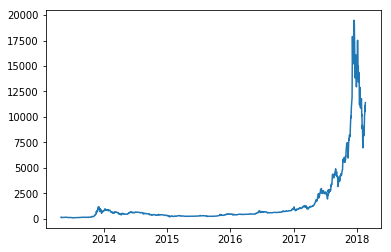

In [7]:
plt.plot(btc['Date'],btc['Close'])

In [7]:
df = pd.read_csv('prices/ethereum_price.csv')
df2 = pd.read_csv('prices/ethereum_dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [8]:
df2.head()

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,7/30/2015,1438214400,0.0,8893,9205,7.204931e+07,0.0,11.5297,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN
1,7/31/2015,1438300800,0.0,0,9361,7.208550e+07,0.0,51.4594,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN
2,8/1/2015,1438387200,0.0,0,9476,7.211320e+07,0.0,57.7845,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN
3,8/2/2015,1438473600,0.0,0,9563,7.214143e+07,0.0,67.9224,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN
4,8/3/2015,1438560000,0.0,0,9639,7.216940e+07,0.0,74.5737,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN


In [11]:
closing_price = df['Close']
high_low = df['High']-df['Low']
date = df['Date']
date = pd.to_datetime(date)
date2 = df2['Date(UTC)']
date2 = pd.to_datetime(date2)

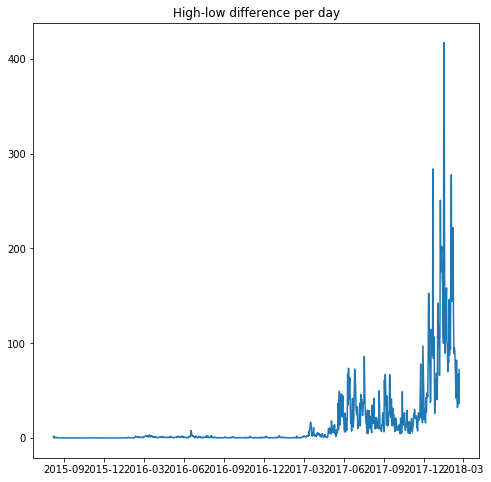

In [5]:
plt.figure(figsize=(8,8))
plt.title("High-low difference per day")
plt.plot(date,high_low)

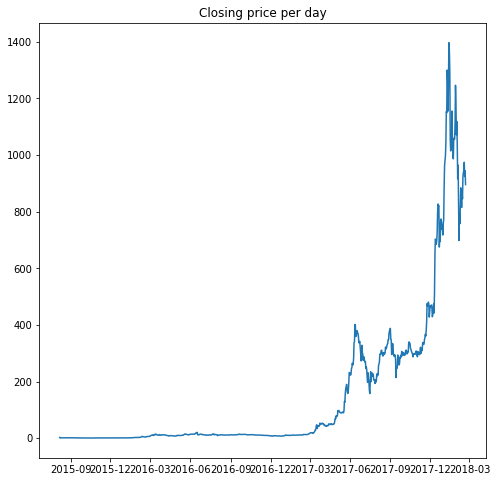

In [15]:
plt.figure(figsize=(8,8))
plt.title("Closing price per day")
plt.plot(date,closing_price)

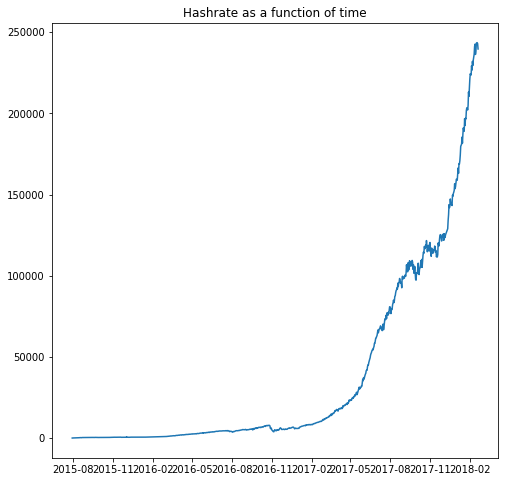

In [17]:
hash_rate = df2['eth_hashrate']
plt.figure(figsize=(8,8))
plt.title("Hashrate as a function of time")
plt.plot(date2, hash_rate)

### 2016 onwards the network started getting users and increased support of mining power from 2015 onwards. So, filtering out data before 2015

In [40]:
eth_price_data = df.loc[date > '2016']

In [47]:
# Replacing Date values with proper formatting
eth_price_data.tail()
eth_price_data['Date'] = date

/home/mihir/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# Replacing Date values with proper formatting
eth_data = df2.loc[date2 > '2016']
eth_data['Date(UTC)'] = date2

/home/mihir/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
eth_data.head()
eth_data['Year'] = eth_data['Date(UTC)'].apply(lambda x: x.year)
eth_data['Month'] = eth_data['Date(UTC)'].apply(lambda x: x.month)

/home/mihir/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mihir/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
eth_data.col

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register,Year,Month
156,2016-01-02,1451692800,0.95,9164,40850,7.619367e+07,72.383985,528.0765,8.147,5095,505,954,16.74,53323453178,3141599,368139389,27383.90625,NaN,2016,1
157,2016-01-03,1451779200,0.96,9258,41000,7.622134e+07,73.172490,544.8281,8.312,5134,529,955,16.51,53342341402,3141597,369359246,27675.78125,NaN,2016,1
158,2016-01-04,1451865600,0.95,9474,41198,7.624876e+07,72.436326,541.3346,8.334,5096,516,981,16.61,54038066808,3141599,402593450,27420.62500,NaN,2016,1
159,2016-01-05,1451952000,0.94,16430,41381,7.627660e+07,71.700008,548.8214,8.306,5126,583,1396,16.47,57078526509,3164299,1081639803,27839.21875,NaN,2016,1
160,2016-01-06,1452038400,0.95,17074,41647,7.630423e+07,72.489018,552.2518,8.423,5090,575,1553,16.63,53724486418,3153939,1248021662,27625.46875,NaN,2016,1


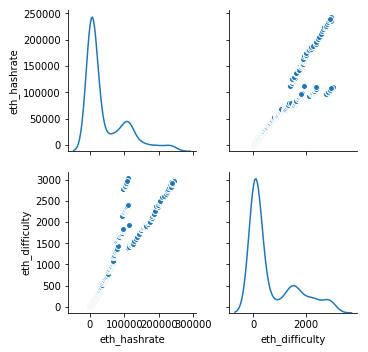

In [109]:
sns.pairplot(eth_data[eth_data.columns[[7,8]]], palette='afmhot', diag_kind='kde')